# Big Food Company - Test

### Join together the three datasets on the following tabs and answer the following questions/perform the following tasks:

In [2]:
# Import pandas > For the manipulation and merging of the different datasets
import pandas as pd

In [3]:
# Load the data sheets into dataframes
data_1 = pd.read_excel('Big Food Company - Test.xlsx', sheet_name='Data 1')
data_2 = pd.read_excel('Big Food Company - Test.xlsx', sheet_name='Data 2')
data_3 = pd.read_excel('Big Food Company - Test.xlsx', sheet_name='Data 3')
taxonomy = pd.read_excel('Big Food Company - Test.xlsx', sheet_name='Taxonomy')
exchange_rates = pd.read_excel('Big Food Company - Test.xlsx', sheet_name='Exchange Rates')
company_structure = pd.read_excel('Big Food Company - Test.xlsx', sheet_name='Company Structure')

data_1

In [4]:
# Convert the "Date" column into years
data_1['Year_D1'] = pd.to_datetime(data_1['Date']).dt.year

In [5]:
# Validate the data types of data_1
print(data_1.dtypes)

Vendor Name              object
Spend                     int64
Description              object
Business Unit            object
Location                 object
Currency                 object
Date             datetime64[ns]
Year_D1                   int32
dtype: object


In [6]:
# Validate the data types of exchange_rates
print(exchange_rates.dtypes)

From     object
To       object
Year      int64
Rate    float64
dtype: object


In [7]:
# Convert the 'Year_D1' column in data_1 from int32 to int64
data_1['Year_D1'] = data_1['Year_D1'].astype('int64')

In [8]:
# Validate again that the data types are the same
print(data_1.dtypes)

Vendor Name              object
Spend                     int64
Description              object
Business Unit            object
Location                 object
Currency                 object
Date             datetime64[ns]
Year_D1                   int64
dtype: object


In [9]:
# Validate the columns of data_1
print(data_1.columns)

Index(['Vendor Name', 'Spend', 'Description', 'Business Unit', 'Location',
       'Currency', 'Date', 'Year_D1'],
      dtype='object')


In [10]:
# Validate the columns of exchange_rates
print(exchange_rates.columns)

Index(['From', 'To', 'Year', 'Rate'], dtype='object')


In [11]:
# The columns of exchange_rates will be renamed to avoid conflicts later on, and they will be printed to verify
exchange_rates = exchange_rates.rename(columns={'Year': 'Year_D1_rn', 'From': 'From_D1', 'To': 'To_D1', 'Rate': 'Rate_D1'})
print(exchange_rates.columns)

Index(['From_D1', 'To_D1', 'Year_D1_rn', 'Rate_D1'], dtype='object')


In [12]:
# data_1 is merged with exchange_rates on Currency and Year_D1, and a new column spend_GBP is calculated by multiplying Spend by Rate_D1. The result is then printed
data_1 = data_1.merge(exchange_rates, left_on=['Currency', 'Year_D1'], right_on=['From_D1', 'Year_D1_rn'], how='left')
data_1['spend_GBP'] = data_1['Spend'] * data_1['Rate_D1']
print(data_1[['Currency', 'Year_D1', 'Spend', 'spend_GBP']])


   Currency  Year_D1   Spend  spend_GBP
0       EUR     2017  163084  136990.56
1       EUR     2018  150000  133500.00
2       GBP     2017  272929        NaN
3       USD     2018  165657  117616.47
4       USD     2018  290826  206486.46
5       GBP     2017  212714        NaN
6       EUR     2017  257653  216428.52
7       GBP     2018  168442        NaN
8       GBP     2018  208506        NaN
9       EUR     2017  151290  127083.60
10      EUR     2017  171914  144407.76
11      USD     2017  157170  124164.30
12      USD     2018  172329  122353.59


data_2

In [13]:
# Convert the "Invoice date" column into years
data_2['Year_D2'] = pd.to_datetime(data_2['Invoice date']).dt.year

C:\Users\pauli\AppData\Local\Temp\ipykernel_19752\3788941293.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_2['Year_D2'] = pd.to_datetime(data_2['Invoice date']).dt.year


In [14]:
# Validate the data types of data_2
print(data_2.dtypes)

Supplier         object
USD Amount        int64
Short Text       object
Location         object
Currency Code    object
Invoice date     object
Year_D2           int32
dtype: object


In [15]:
# Validate the data types of exchange_rates
print(exchange_rates.dtypes)

From_D1        object
To_D1          object
Year_D1_rn      int64
Rate_D1       float64
dtype: object


In [16]:
# Convert the 'Year_D2' column in data_2 from int32 to int64
data_2['Year_D2'] = data_2['Year_D2'].astype('int64')

In [17]:
# Validate again that the data types are the same
print(data_2.dtypes)

Supplier         object
USD Amount        int64
Short Text       object
Location         object
Currency Code    object
Invoice date     object
Year_D2           int64
dtype: object


In [18]:
# Validate the columns of data_2
print(data_2.columns)

Index(['Supplier', 'USD Amount', 'Short Text', 'Location', 'Currency Code',
       'Invoice date', 'Year_D2'],
      dtype='object')


In [19]:
# Validate the columns of exchange_rates
print(exchange_rates.columns)

Index(['From_D1', 'To_D1', 'Year_D1_rn', 'Rate_D1'], dtype='object')


In [20]:
# The columns of exchange_rates will be renamed to avoid conflicts later on, and they will be printed to verify
exchange_rates = exchange_rates.rename(columns={'Year_D1_rn': 'Year_D2_rn', 'From_D1': 'From_D2', 'To_D1': 'To_D2', 'Rate_D1': 'Rate_D2'})
print(exchange_rates.columns)

Index(['From_D2', 'To_D2', 'Year_D2_rn', 'Rate_D2'], dtype='object')


In [21]:
# data_2 is merged with exchange_rates on Currency Code and Year_D2, then a new column spend_GBP is calculated by multiplying USD Amount by Rate_D2. The result is then printed.
data_2 = data_2.merge(exchange_rates, left_on=['Currency Code', 'Year_D2'], right_on=['From_D2', 'Year_D2_rn'], how='left')
data_2['spend_GBP'] = data_2['USD Amount'] * data_2['Rate_D2']
print(data_2[['Currency Code', 'Year_D2', 'USD Amount', 'spend_GBP']])

   Currency Code  Year_D2  USD Amount  spend_GBP
0            USD     2017      219583  173470.57
1            USD     2017      279016  220422.64
2            USD     2018      167738  119093.98
3            USD     2018      173120  122915.20
4            USD     2017      169336  133775.44
5            USD     2018      241994  171815.74
6            USD     2017      190932  150836.28
7            USD     2018      262630  186467.30
8            USD     2017      261947  206938.13
9            USD     2018      262155  186130.05
10           USD     2018      166396  118141.16
11           USD     2017      275780  217866.20
12           USD     2018      250000  177500.00
13           USD     2018      175000  124250.00


data_3

In [22]:
# Convert the "DT" column into years
data_3['Year_D3'] = pd.to_datetime(data_3['DT']).dt.year

In [23]:
# Validate the data types of data_3
print(data_3.dtypes)

Vendor Name         object
Line Amount          int64
Short Text          object
Plant               object
Invoice Currency    object
DT                  object
Year_D3              int32
dtype: object


In [24]:
# Validate the data types of exchange_rates
print(exchange_rates.dtypes)

From_D2        object
To_D2          object
Year_D2_rn      int64
Rate_D2       float64
dtype: object


In [25]:
# Convert the 'Year_D3' column in data_3 from int32 to int64
data_3['Year_D3'] = data_3['Year_D3'].astype('int64')

In [26]:
# Validate again that the data types are the same
print(data_3.dtypes)

Vendor Name         object
Line Amount          int64
Short Text          object
Plant               object
Invoice Currency    object
DT                  object
Year_D3              int64
dtype: object


In [27]:
# Validate the columns of data_3
print(data_3.columns)

Index(['Vendor Name', 'Line Amount', 'Short Text', 'Plant', 'Invoice Currency',
       'DT', 'Year_D3'],
      dtype='object')


In [28]:
# Validate the columns of exchange_rates
print(exchange_rates.columns)

Index(['From_D2', 'To_D2', 'Year_D2_rn', 'Rate_D2'], dtype='object')


In [29]:
# The columns of exchange_rates will be renamed to avoid conflicts later on, and they will be printed to verify
exchange_rates = exchange_rates.rename(columns={'Year_D2_rn': 'Year_D3_rn', 'From_D2': 'From_D3', 'To_D2': 'To_D3', 'Rate_D2': 'Rate_D3'})
print(exchange_rates.columns)

Index(['From_D3', 'To_D3', 'Year_D3_rn', 'Rate_D3'], dtype='object')


In [30]:
# data_3 is merged with exchange_rates on Invoice Currency and Year_D3, then a new column spend_GBP is calculated by multiplying Line Amount by Rate_D3. The result is then printed.
data_3 = data_3.merge(exchange_rates, left_on=['Invoice Currency', 'Year_D3'], right_on=['From_D3', 'Year_D3_rn'], how='left')
data_3['spend_GBP'] = data_3['Line Amount'] * data_3['Rate_D3']
print(data_3[['Invoice Currency', 'Year_D3', 'Line Amount', 'spend_GBP']])

   Invoice Currency  Year_D3  Line Amount  spend_GBP
0               CNY     2018      1918670  211053.70
1               CNY     2017      2789760  306873.60
2               CNY     2017      2726370  299900.70
3               CNY     2018      1717140  188885.40
4               CNY     2018      1852650  203791.50
5               CNY     2017      2215820  243740.20
6               CNY     2018      1975750  217332.50
7               CNY     2018      2618330  288016.30
8               CNY     2017      2561140  281725.40
9               CNY     2018      1523760  167613.60
10              CNY     2017      1700220  187024.20
11              CNY     2018      1991260  219038.60
12              CNY     2018      4537998  499179.78


Merge the dataframes - The three dataframes are merged to combine relevant information from each one based on common columns, allowing the data to be enriched with exchange rate information.

In [31]:
# Select only the relevant columns from each dataframe
data_1 = data_1[['Vendor Name', 'spend_GBP', 'Description', 'Business Unit', 'Location', 'Date', 'Currency']]
data_2 = data_2[['Supplier', 'spend_GBP', 'Short Text', 'Location', 'Invoice date', 'Currency Code']]
data_3 = data_3[['Vendor Name', 'spend_GBP', 'Short Text', 'Plant', 'DT', 'Invoice Currency']]

In [32]:
# Normalize column names
data_2.rename(columns={'Supplier': 'Vendor Name', 'Invoice date': 'Date', 'Currency Code': 'Currency'}, inplace=True)
data_3.rename(columns={'Plant': 'Location', 'DT': 'Date', 'Invoice Currency': 'Currency'}, inplace=True)

In [33]:
# Merge all the datasets
all_data = pd.concat([data_1, data_2, data_3], ignore_index=True)

Libraries for creating graphs

In [34]:
# Import matplotlib > To create graphs
import matplotlib.pyplot as plt
# Import seaborn > To create graphs
import seaborn as sns

#### 1. What is the total spend from the 3 Business Units in GBP?

In [35]:
# The data is grouped by "Business Unit," and the total spend in GBP (spend_GBP) is calculated for each unit
total_spend = all_data.groupby('Business Unit')['spend_GBP'].sum()
print("Total GBP Spend by the Three Business Units:", total_spend.sum())

Total GBP Spend by the Three Business Units: 1329031.26


#### 2. What is the largest category of spend at Level 1 in GBP?

In [36]:
# The data is merged with taxonomy on "Description" and "Level 2." Then, it calculates the category with the highest spend at "Level 1" and prints the result
all_data = all_data.merge(taxonomy, left_on='Description', right_on='Level 2', how='left')
largest_category = all_data.groupby('Level 1')['spend_GBP'].sum().idxmax()
print("The category with the highest spend at Level 1 in GBP:", largest_category)

The category with the highest spend at Level 1 in GBP: Professional Services


#### 3. Who is the biggest supplier in GBP?

In [37]:
# The data is grouped by "Vendor Name," and the supplier with the highest spend in GBP is identified and printed
biggest_supplier = all_data.groupby('Vendor Name')['spend_GBP'].sum().idxmax()
print("Biggest Supplier in GBP:", biggest_supplier)

Biggest Supplier in GBP: International Freight Company


#### a. Graph the spend in GBP by Normalised Supplier

C:\Users\pauli\AppData\Local\Temp\ipykernel_19752\1579165237.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=all_data, x='Vendor Name', y='spend_GBP', estimator=sum, ci=None, palette='viridis')
C:\Users\pauli\AppData\Local\Temp\ipykernel_19752\1579165237.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=all_data, x='Vendor Name', y='spend_GBP', estimator=sum, ci=None, palette='viridis')


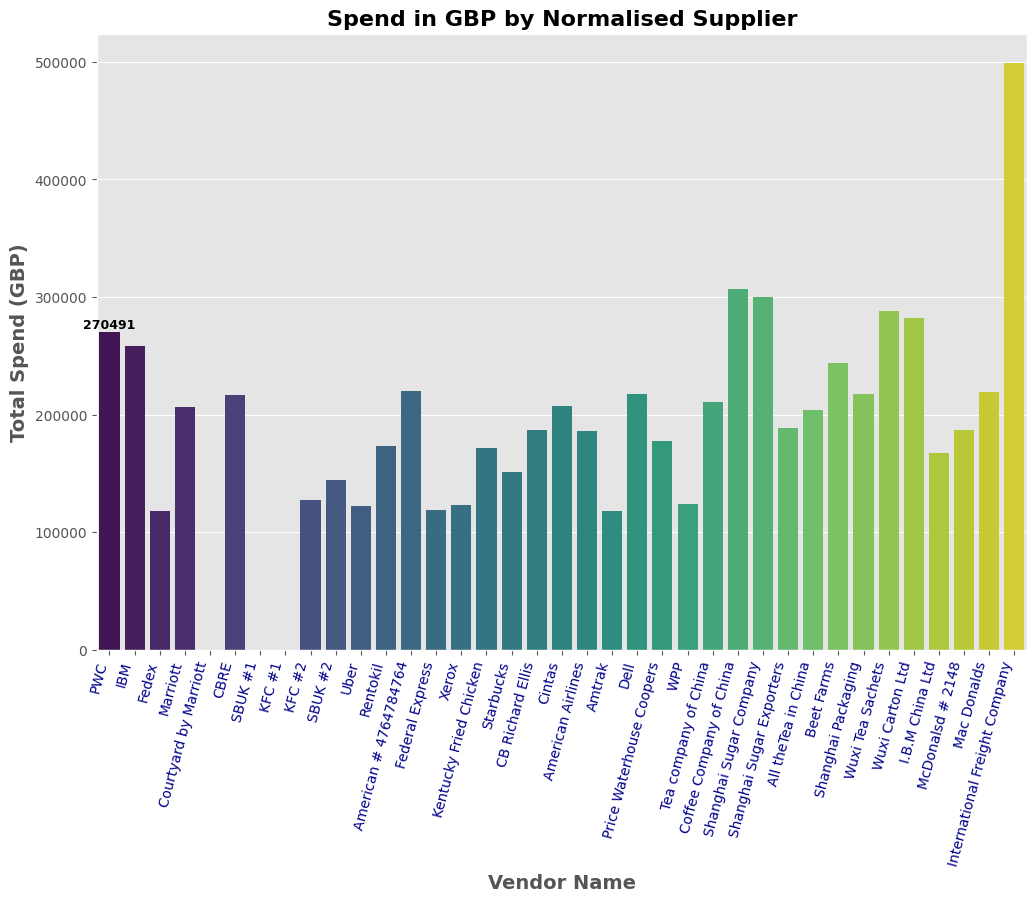

In [38]:
# A styled bar plot shows total GBP spend by vendor, with labels, rotated x-axis, and customized title and axes.
plt.style.use('ggplot')
sns.set_palette("bright")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=all_data, x='Vendor Name', y='spend_GBP', estimator=sum, ci=None, palette='viridis')
barplot.bar_label(barplot.containers[0], fmt='%.0f', label_type='edge', color='black', fontsize=9, fontweight='bold')
plt.xticks(rotation=75, ha='right', fontsize=10, color='darkblue')
plt.title("Spend in GBP by Normalised Supplier", fontsize=16, fontweight='bold')
plt.xlabel("Vendor Name", fontsize=14, fontweight='bold')
plt.ylabel("Total Spend (GBP)", fontsize=14, fontweight='bold')
plt.show()

#### b. Graph the Spend in GBP by Level 1

C:\Users\pauli\AppData\Local\Temp\ipykernel_19752\1497657517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=all_data, x='Level 1', y='spend_GBP', estimator=sum, errorbar=None, palette='coolwarm')


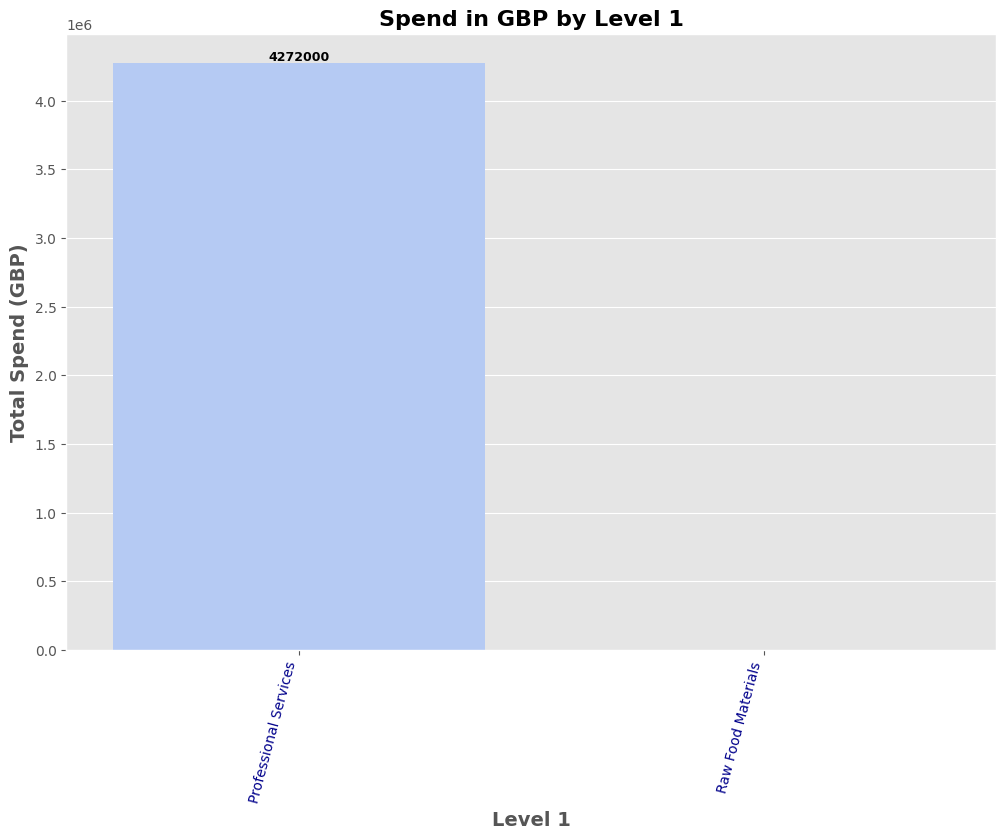

In [79]:
# A bar plot shows total GBP spend by "Level 1" with labels, rotated x-axis, and custom styling
plt.style.use('ggplot')
sns.set_palette("Spectral")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=all_data, x='Level 1', y='spend_GBP', estimator=sum, errorbar=None, palette='coolwarm')
plt.xticks(rotation=75, ha='right', fontsize=10, color='darkblue')
barplot.bar_label(barplot.containers[0], fmt='%.0f', label_type='edge', color='black', fontsize=9, fontweight='bold')
plt.title("Spend in GBP by Level 1", fontsize=16, fontweight='bold')
plt.xlabel("Level 1", fontsize=14, fontweight='bold')
plt.ylabel("Total Spend (GBP)", fontsize=14, fontweight='bold')
plt.show()

#### c. Graph the original currencies by percentage of contribution

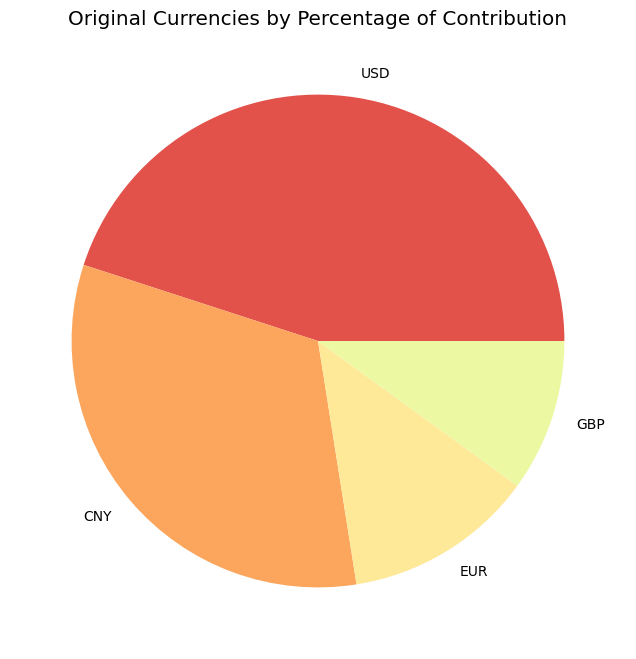

In [40]:
# The percentage of each currency's contribution is calculated and displayed as a pie chart, with the y-axis label removed and a title added
currency_percentage = all_data['Currency'].value_counts(normalize=True) * 100
currency_percentage.plot(kind='pie', figsize=(8, 8))
plt.title("Original Currencies by Percentage of Contribution")
plt.ylabel('')
plt.show()

#### d. Graph the spend in GBP by Region

In [50]:
# Rename columns before merging.
company_structure.rename(columns={'Business Unit': 'Business Unit_company'}, inplace=True)
all_data = all_data.merge(company_structure[['Location', 'Region', 'Business Unit_company']], 
                          on='Location', how='left')

In [51]:
# Drop duplicates after merging
all_data = all_data.merge(company_structure[['Location', 'Region', 'Business Unit_company']], 
                          on='Location', how='left', suffixes=('_data', '_company'))

# Drop duplicate columns
all_data.drop(columns=['Business Unit_data'], inplace=True)

C:\Users\pauli\AppData\Local\Temp\ipykernel_19752\3262213915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=all_data, x='Region', y='spend_GBP', estimator=sum, errorbar=None, palette='coolwarm')


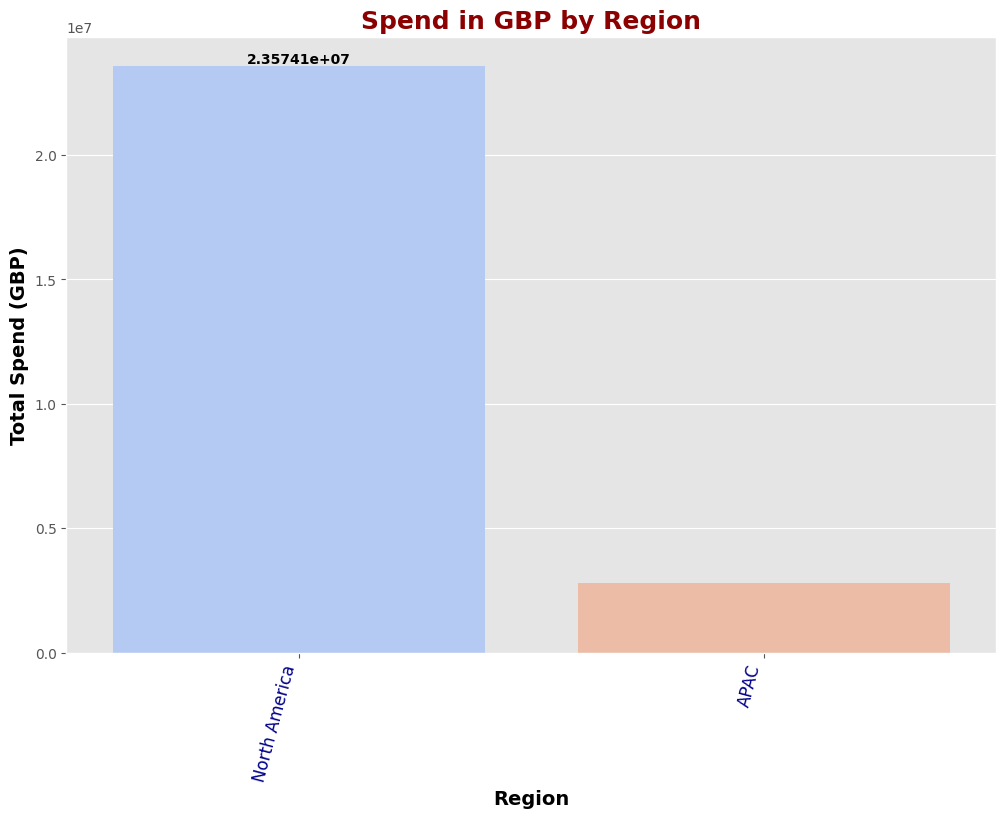

In [77]:
# A bar plot shows total GBP spend by region with labels, custom styling, rotated x-axis, and bold title and axis labels
plt.style.use('ggplot')
sns.set_palette("Spectral")  
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=all_data, x='Region', y='spend_GBP', estimator=sum, errorbar=None, palette='coolwarm')
barplot.bar_label(barplot.containers[0], label_type='edge', color='black', fontsize=10, fontweight='bold')
plt.xticks(rotation=75, ha='right', fontsize=12, color='darkblue')
plt.title("Spend in GBP by Region", fontsize=18, fontweight='bold', color='darkred')
plt.xlabel("Region", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Total Spend (GBP)", fontsize=14, fontweight='bold', color='black')
plt.show()

#### e. Graph the spend in GBP by Location

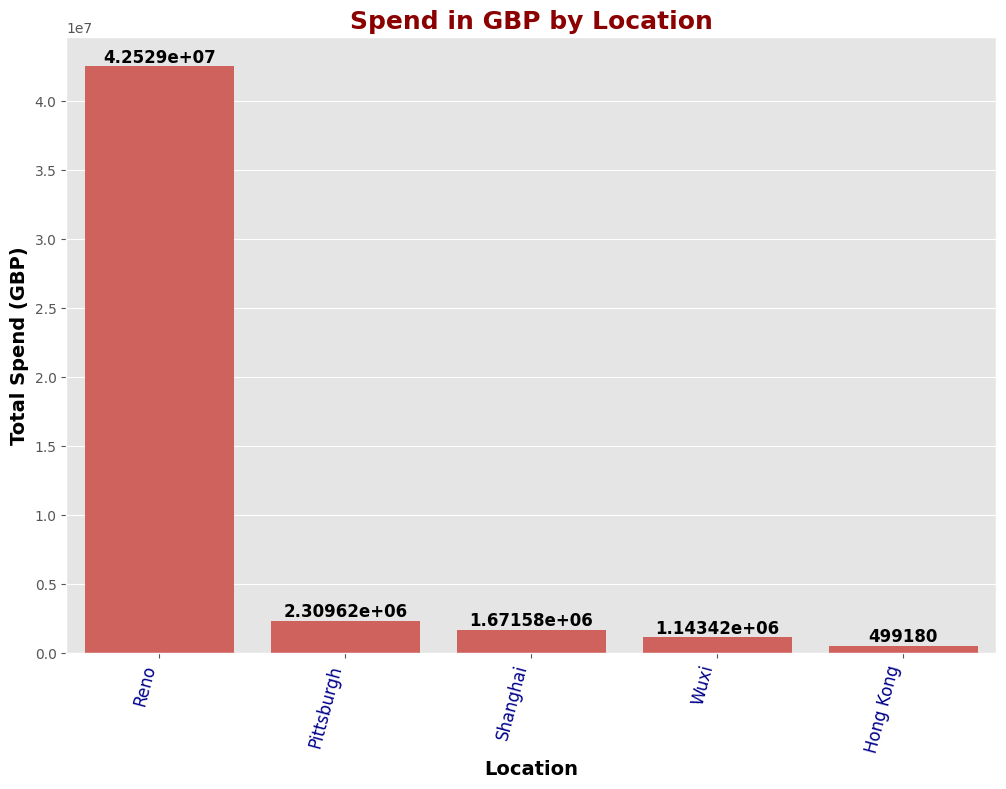

In [78]:
# A bar plot shows total GBP spend by location with labeled bars, rotated x-axis labels, and customized title and axis labels
plt.figure(figsize=(12, 8))
sns.set_palette("Spectral")  
barplot = sns.barplot(data=all_data, x='Location', y='spend_GBP', estimator=sum, errorbar=None)
barplot.bar_label(barplot.containers[0], label_type='edge', color='black', fontsize=12, fontweight='bold')
plt.xticks(rotation=75, ha='right', fontsize=12, color='darkblue')
plt.title("Spend in GBP by Location", fontsize=18, fontweight='bold', color='darkred')
plt.xlabel("Location", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Total Spend (GBP)", fontsize=14, fontweight='bold', color='black')
plt.show()

#### f. Graph the spend in GBP by Year and Month

In [60]:
# Convert the Date column to datetime
all_data['Date'] = pd.to_datetime(all_data['Date'])
# The year_month column is created by extracting the year and month from the Date colum
all_data['year_month'] = all_data['Date'].dt.to_period('M')

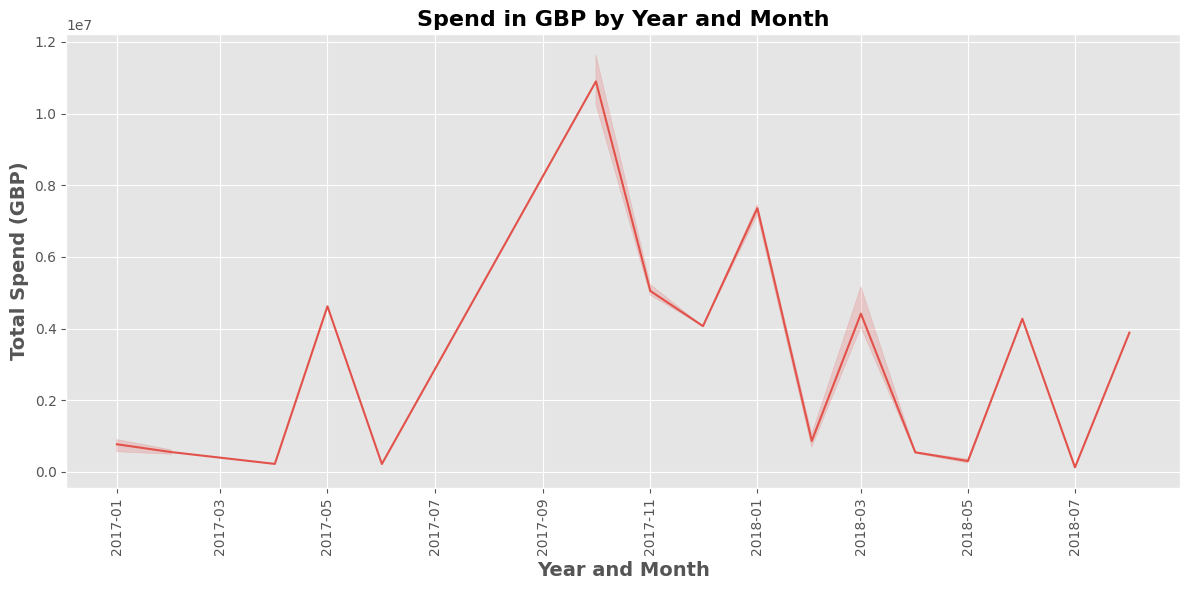

In [ ]:
# A line plot is created to show the total GBP spend over time, grouped by year and month
all_data['year_month'] = all_data['year_month'].dt.to_timestamp()
all_data['year_month'] = all_data['year_month'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_data, x='year_month', y='spend_GBP', estimator='sum')
plt.xticks(rotation=90)
plt.title("Spend in GBP by Year and Month", fontsize=16, fontweight='bold')
plt.xlabel("Year and Month", fontsize=14, fontweight='bold')
plt.ylabel("Total Spend (GBP)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()